<a href="https://colab.research.google.com/github/nkilaru213/ai-excercises/blob/main/mimic_nlp_notevents_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Start by uploading the DIAGNOSES_ICD file and getting all patients for ICD_CODE=430**

In [6]:

import pandas as pd
from google.colab import files

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
diagnoses_icd_df=pd.read_csv('/content/drive/My Drive/Exercises/DIAGNOSES_ICD.csv.gz', compression='gzip')

diagnoses_icd_df.info()
diagnoses_icd_df.iloc[0]
print(len(diagnoses_icd_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      651047 non-null  int64  
 1   SUBJECT_ID  651047 non-null  int64  
 2   HADM_ID     651047 non-null  int64  
 3   SEQ_NUM     651000 non-null  float64
 4   ICD9_CODE   651000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB
651047


In [9]:
# **Step 2: Extract SUBJECT_IDs for ICD-9 Code 'V4511'**
if diagnoses_icd_df is not None:
    # Ensure column names match exactly (fix case issues)
    diagnoses_icd_df.columns = diagnoses_icd_df.columns.str.upper()

    # **Vectorized Filtering (MUCH Faster than Loops)**
    filtered_df = diagnoses_icd_df.loc[diagnoses_icd_df["ICD9_CODE"] == "V4511"]

    # Extract SUBJECT_ID and HADM_ID as lists
    arr_subject_id = filtered_df["SUBJECT_ID"].tolist()
    arr_hadm_id = filtered_df["HADM_ID"].tolist()

    # **Step 3: Print Results**
    print(f"✅ Found {len(arr_subject_id)} records for ICD-9 Code 'V4511'.")
    print("📌 SUBJECT_IDs:", arr_subject_id[:10])  # Show only first 10 IDs for readability


✅ Found 594 records for ICD-9 Code 'V4511'.
📌 SUBJECT_IDs: [109, 109, 109, 109, 109, 109, 107, 109, 209, 689]


In [10]:
    # Ensure 'ICD9_CODE' exists in the dataset
    if "ICD9_CODE" in diagnoses_icd_df.columns and "SUBJECT_ID" in diagnoses_icd_df.columns and "HADM_ID" in diagnoses_icd_df.columns:
        # **Vectorized Filtering (MUCH Faster)**
        filtered_df = diagnoses_icd_df[diagnoses_icd_df["ICD9_CODE"] == "V4511"]

        # Extract SUBJECT_ID and HADM_ID as lists
        arr_subject_id = filtered_df["SUBJECT_ID"].tolist()
        arr_hadm_id = filtered_df["HADM_ID"].tolist()

        # **Step 3: Print Results**
        print(f"✅ Found {len(arr_subject_id)} records for ICD-9 Code 'V4511'.")
        print("📌 First 10 SUBJECT_IDs:", arr_subject_id[:10])  # Show only first 10 IDs for readability
    else:
        print("❌ Error: One or more required columns ('ICD9_CODE', 'SUBJECT_ID', 'HADM_ID') are missing in the dataset.")

✅ Found 594 records for ICD-9 Code 'V4511'.
📌 First 10 SUBJECT_IDs: [109, 109, 109, 109, 109, 109, 107, 109, 209, 689]


In [11]:
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv("your_file.csv")  # Uncomment if loading from a CSV file

# 1. Check if DataFrame is empty
if diagnoses_icd_df.empty:
    print("The DataFrame is empty. Please check your data source.")
else:
    print(f"DataFrame shape: {diagnoses_icd_df.shape}")

# 2. Print all column names to see if 'subject_id' exists
print("Column Names:", diagnoses_icd_df.columns.tolist())

# 3. Check for typos, hidden spaces, or similar column names
similar_columns = [col for col in diagnoses_icd_df.columns if 'subject' in col.lower()]
print("Similar columns found:", similar_columns)

# 4. Strip spaces and rename columns if needed
diagnoses_icd_df.columns = diagnoses_icd_df.columns.str.strip()

# 5. Convert all column names to lowercase for consistency (optional)
diagnoses_icd_df.columns = diagnoses_icd_df.columns.str.lower()

# 6. Try accessing 'subject_id' safely
column_name = 'subject_id'
if column_name in diagnoses_icd_df.columns:
    subject_id_values = diagnoses_icd_df[column_name]
    print(f"Successfully accessed '{column_name}' column.")
else:
    print(f"Column '{column_name}' not found. Available columns: {diagnoses_icd_df.columns.tolist()}")

# 7. Alternative safe access using .get() to prevent KeyError
subject_id_values = diagnoses_icd_df.get(column_name, "Column Not Found")
print(subject_id_values)


DataFrame shape: (651047, 5)
Column Names: ['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE']
Similar columns found: ['SUBJECT_ID']
Successfully accessed 'subject_id' column.
0           109
1           109
2           109
3           109
4           109
          ...  
651042    97503
651043    97503
651044    97503
651045    97503
651046    97503
Name: subject_id, Length: 651047, dtype: int64


# **Read NOTEEVENTS Table data from gzip file**

# **Method:1**

In [12]:
# read the uploaded file in a dataframe
# Use the correct filename: 'NOTEEVENTS.csv.gz' and specify compression as 'gzip'
noteevents_df=pd.read_csv('/content/drive/My Drive/Exercises/NOTEEVENTS.csv.gz', compression='gzip')


<ipython-input-12-f174019486c9>:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  noteevents_df=pd.read_csv('/content/drive/My Drive/Exercises/NOTEEVENTS.csv.gz', compression='gzip')


In [13]:
noteevents_df.info()
noteevents_df.iloc[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ROW_ID       int64  
 1   SUBJECT_ID   int64  
 2   HADM_ID      float64
 3   CHARTDATE    object 
 4   CHARTTIME    object 
 5   STORETIME    object 
 6   CATEGORY     object 
 7   DESCRIPTION  object 
 8   CGID         float64
 9   ISERROR      float64
 10  TEXT         object 
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB


,0
ROW_ID,174
SUBJECT_ID,22532
HADM_ID,167853.0
CHARTDATE,2151-08-04
CHARTTIME,NaN
STORETIME,NaN
CATEGORY,Discharge summary
DESCRIPTION,Report
CGID,NaN
ISERROR,NaN


# **Filter the data in files to create a new relevant dataframe**



In [14]:
icd9_V4511_patients_discharge_summary_df = pd.DataFrame(columns=['SUBJECT_ID', 'CATEGORY', 'TEXT'])
patients_dict = {"SUBJECT_ID":[],"CATEGORY":[],"TEXT":[]};

In [15]:
# Add the import statement at the beginning of the cell where 'pd' is used.
import pandas as pd # Import the pandas library and assign it to the alias 'pd'

icd9_V4511_patients_discharge_summary_df = pd.DataFrame(columns=['SUBJECT_ID', 'CATEGORY', 'TEXT'])
patients_dict = {"SUBJECT_ID":[],"CATEGORY":[],"TEXT":[]};

In [16]:
for i in range(0, len(noteevents_df)):
  if((noteevents_df.loc[i, 'SUBJECT_ID'] in arr_subject_id)):
   patients_dict["SUBJECT_ID"].append(noteevents_df.loc[i, 'SUBJECT_ID'])
   patients_dict["CATEGORY"].append(noteevents_df.loc[i, 'CATEGORY'])
   patients_dict["TEXT"].append(noteevents_df.loc[i, 'TEXT'])

In [15]:
# First, execute this cell to define and populate noteevents_df. If not outputting data to screen add display(noteevents_df)
display(noteevents_df) #If no output from before add this.


,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
...,...,...,...,...,...,...,...,...,...,...,...
2083175,2070657,31097,115637.0,2132-01-21,2132-01-21 03:27:00,2132-01-21 03:38:00,Nursing/other,Report,17581.0,NaN,NPN\n\n\n#1 Infant remains in RA with O2 sats...
2083176,2070658,31097,115637.0,2132-01-21,2132-01-21 09:50:00,2132-01-21 09:53:00,Nursing/other,Report,19211.0,NaN,"Neonatology\nDOL #5, CGA 36 weeks.\n\nCVR: Con..."
2083177,2070659,31097,115637.0,2132-01-21,2132-01-21 16:42:00,2132-01-21 16:44:00,Nursing/other,Report,20104.0,NaN,Family Meeting Note\nFamily meeting held with ...
2083178,2070660,31097,115637.0,2132-01-21,2132-01-21 18:05:00,2132-01-21 18:16:00,Nursing/other,Report,16023.0,NaN,NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...


In [16]:
# Make sure to run the cell where you create and populate arr_subject_id first.
# For example, the code below likely created it:
arr_subject_id=[]
arr_hadm_id=[]
for row in range(0, len(diagnoses_icd_df)):
  if(diagnoses_icd_df.loc[row, 'icd9_code']=='99591'): #V4511 = Comma
    arr_subject_id.append(diagnoses_icd_df.loc[row, 'subject_id'])


# Then execute the cell that uses the dataframe
for i in range(0, len(noteevents_df)):
  if((noteevents_df.loc[i, 'SUBJECT_ID'] in arr_subject_id)):
   patients_dict["SUBJECT_ID"].append(noteevents_df.loc[i, 'SUBJECT_ID'])
   patients_dict["CATEGORY"].append(noteevents_df.loc[i, 'CATEGORY'])
   patients_dict["TEXT"].append(noteevents_df.loc[i, 'TEXT'])

In [19]:
patients_df = pd.DataFrame(patients_dict)

# **Download the created datafram (whole or a part of it)**


In [20]:

# to keep only certain (say for eg. 10) number of rows of a dataframe
patients_df[:100]  # this will fetch the top 10 rows

patients_df[-100:] # this will fetch the last 10 rows



,SUBJECT_ID,CATEGORY,TEXT
154863,32433,Nursing/other,NP NOTE\nPE: small orally intubated preterm in...
154864,27800,Physician,Chief Complaint: Respiratory failure\n I saw...
154865,27800,Physician,Chief Complaint: Respiratory failure\n I saw...
154866,27800,Physician,Chief Complaint: Respiratory failure\n I saw...
154867,27800,Physician,Chief Complaint: Respiratory failure\n I saw...
...,...,...,...
154958,76418,Physician,"Chief Complaint: delirium, GI blood loss anemi..."
154959,76418,Physician,"Chief Complaint: delirium, GI blood loss anemi..."
154960,73713,Physician,TITLE:\n Chief Complaint:\n 24 Hour Events...
154961,73713,Physician,TITLE:\n Chief Complaint:\n 24 Hour Events...


In [21]:
import pandas as pd
# ... (other code to create patients_dict) ...

# Create the DataFrame
patients_df = pd.DataFrame(patients_dict)

# Now you can access it
# to keep only certain (say for eg. 10) number of rows of a dataframe
patients_df[:10]  # this will fetch the top 10 rows

patients_df[-10:] # this will fetch the last 10 rows



,SUBJECT_ID,CATEGORY,TEXT
154953,32286,Physician,Chief Complaint:\n 24 Hour Events:\n Bron...
154954,93610,Physician,"TITLE:\n Chief Complaint: 85 year old man, r..."
154955,76327,Physician,Chief Complaint:\n 24 Hour Events:\n - Att...
154956,76327,Physician,Chief Complaint:\n 24 Hour Events:\n - Att...
154957,76327,Physician,Chief Complaint:\n 24 Hour Events:\n - Att...
154958,76418,Physician,"Chief Complaint: delirium, GI blood loss anemi..."
154959,76418,Physician,"Chief Complaint: delirium, GI blood loss anemi..."
154960,73713,Physician,TITLE:\n Chief Complaint:\n 24 Hour Events...
154961,73713,Physician,TITLE:\n Chief Complaint:\n 24 Hour Events...
154962,73713,Physician,TITLE:\n Chief Complaint:\n 24 Hour Events...


# **Entity Extraction with SpaCy & SciSpaCy**


In [2]:
%pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_md-0.2.4.tar.gz
%pip install spacy==3.5.3
%pip install scispacy
%pip install en_core_sci_md

%pip install scispacy
%pip install https://huggingface.co/allenai/scispacy_models/resolve/main/en_core_sci_scibert-0.5.1.tar.gz



  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_md-0.2.4.tar.gz (70.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.7.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached thinc-8.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 50.5 MB/s eta 0:00:00
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.12
    Uninstalling thinc-8.1.12:
      Successfully uninstalled thinc-8.1.12
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.3
    Uninstalling spacy-3.5.3:
      Successfully uninstalled spacy-3.5.3


ERROR: Operation cancelled by user
^C
^C


**Load SpaCy Model:**

In [3]:
import spacy
import scispacy

# Load scientific NLP model
nlp = spacy.load("en_core_web_sm")



In [17]:
noteevents_df = noteevents_df.dropna(subset=['TEXT'])  # Remove rows with missing text
print(noteevents_df.head())

   ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     174       22532  167853.0  2151-08-04       NaN       NaN   
1     175       13702  107527.0  2118-06-14       NaN       NaN   
2     176       13702  167118.0  2119-05-25       NaN       NaN   
3     177       13702  196489.0  2124-08-18       NaN       NaN   
4     178       26880  135453.0  2162-03-25       NaN       NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Discharge summary      Report   NaN      NaN   
1  Discharge summary      Report   NaN      NaN   
2  Discharge summary      Report   NaN      NaN   
3  Discharge summary      Report   NaN      NaN   
4  Discharge summary      Report   NaN      NaN   

                                                TEXT  
0  Admission Date:  [**2151-7-16**]       Dischar...  
1  Admission Date:  [**2118-6-2**]       Discharg...  
2  Admission Date:  [**2119-5-4**]              D...  
3  Admission Date:  [**2124-7-21**]              ...  
4  Admission Da

**Extract Named Entities**

In [21]:
# Extract entities from a sample note
sample_note = noteevents_df['TEXT'].iloc[0]
doc = nlp(sample_note)

for ent in doc.ents:
    print(ent.text, ent.label_)

2151-7-16 DATE
2151-8-4 DATE
Radiologic PERSON
CT ORG
Abdominal CT ORG
T10 ORG
First ORDINAL
First Name4 ORG
1775 DATE
M.D. GPE
MD GPE
1776 DATE
1807 DATE
2151-8-5 DATE
2151-8-5 DATE
Number 1808 DATE


In [ ]:
# Merge with filtered diagnoses to get relevant notes
notes_filtered_df = filtered_df.merge(notes_df, on="SUBJECT_ID", how="left")

# Display some notes
print(notes_filtered_df[['TEXT']].head())

new = notes_filtered_df[notes_filtered_df['CATEGORY'] == 'Discharge summary']
len(new)

**Visualize Entities**

In [25]:
# Entity Visualizer :
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)




In [18]:
noteevents_df['CATEGORY'].unique()

array(['Discharge summary', 'Echo', 'ECG', 'Nursing', 'Physician ',
       'Rehab Services', 'Case Management ', 'Respiratory ', 'Nutrition',
       'General', 'Social Work', 'Pharmacy', 'Consult', 'Radiology',
       'Nursing/other'], dtype=object)

In [19]:
len(noteevents_df[noteevents_df['CATEGORY'] == 'Discharge summary'])

59652

In [20]:
len(noteevents_df['CATEGORY'] == 'Echo')

2083180

In [26]:
noteevents_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


# **Word Embedding Using Word2Vec**


**Preprocessor Notes**

In [32]:
from gensim.utils import simple_preprocess

# Tokenize notes
tokenized_notes = [simple_preprocess(text) for text in noteevents_df['TEXT'].head(1000)]

**Train Word2Vec Model**

In [33]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_notes, vector_size=100, window=5, min_count=5, workers=4)

# Find similar terms
terms = model.wv.most_similar('fever', topn=5)
print(terms)

[('fevers', 0.8349403738975525), ('vomiting', 0.7761870622634888), ('chills', 0.743204653263092), ('sob', 0.7350306510925293), ('cough', 0.73163902759552)]


# **Dimensionality Reduction with t-SNE**

**Reduce Dimensions**

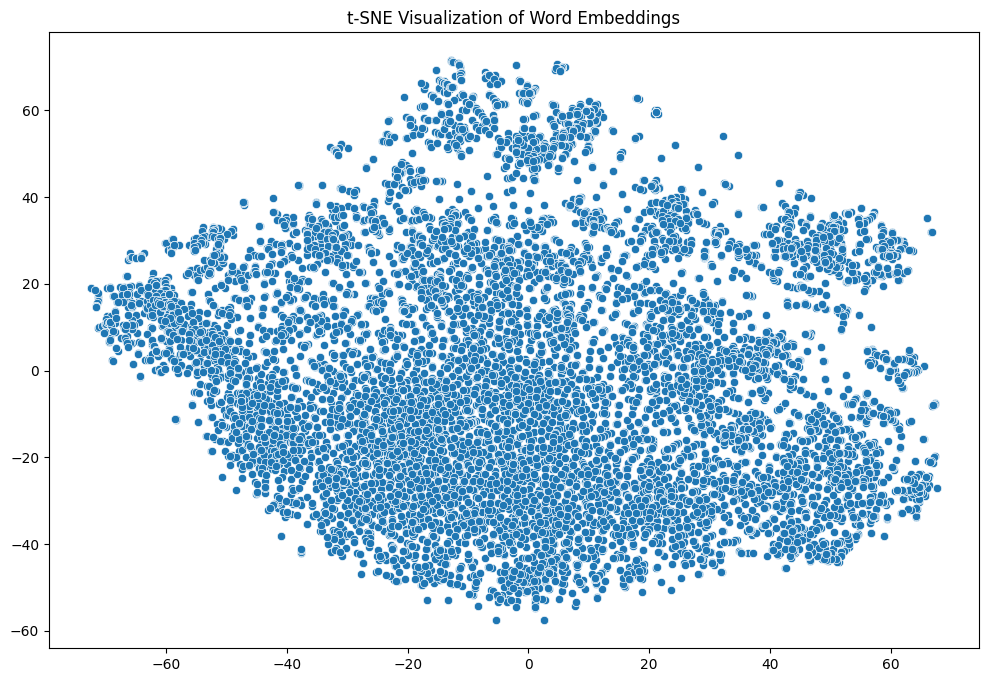

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Extract word vectors
word_vectors = model.wv.vectors

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1])
plt.title('t-SNE Visualization of Word Embeddings')
plt.show()

In [ ]:
diagnoses_df = pd.read_csv('DIAGNOSES_ICD.csv.gz', compression='gzip')
diagnoses_df

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275


In [ ]:
admission_df = pd.read_csv('ADMISSIONS.csv.gz', compression='gzip')
admission_df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [ ]:
patient_df = pd.read_csv('PATIENTS.csv.gz', compression='gzip')
patient_df

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
46515,31840,44089,M,2026-05-25 00:00:00,NaN,NaN,NaN,0
46516,31841,44115,F,2124-07-27 00:00:00,NaN,NaN,NaN,0
46517,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1
46518,31843,44126,F,2076-07-25 00:00:00,NaN,NaN,NaN,0


In [ ]:
notes_df = pd.read_csv('NOTEEVENTS.csv.gz', compression='gzip')
notes_df

<ipython-input-6-5a61e649f93c>:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  notes_df = pd.read_csv('NOTEEVENTS.csv.gz', compression='gzip')


,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
...,...,...,...,...,...,...,...,...,...,...,...
2083175,2070657,31097,115637.0,2132-01-21,2132-01-21 03:27:00,2132-01-21 03:38:00,Nursing/other,Report,17581.0,NaN,NPN\n\n\n#1 Infant remains in RA with O2 sats...
2083176,2070658,31097,115637.0,2132-01-21,2132-01-21 09:50:00,2132-01-21 09:53:00,Nursing/other,Report,19211.0,NaN,"Neonatology\nDOL #5, CGA 36 weeks.\n\nCVR: Con..."
2083177,2070659,31097,115637.0,2132-01-21,2132-01-21 16:42:00,2132-01-21 16:44:00,Nursing/other,Report,20104.0,NaN,Family Meeting Note\nFamily meeting held with ...
2083178,2070660,31097,115637.0,2132-01-21,2132-01-21 18:05:00,2132-01-21 18:16:00,Nursing/other,Report,16023.0,NaN,NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...


# **Load Admissions Table**

In [35]:
df_adm=pd.read_csv('/content/drive/My Drive/Exercises/ADMISSIONS.csv.gz', compression='gzip')

In [36]:
df_adm.head()
df_adm.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [37]:
df_adm.groupby(['ADMISSION_TYPE']).size()

,0
ADMISSION_TYPE,
ELECTIVE,7706
EMERGENCY,42071
NEWBORN,7863
URGENT,1336


## **Convert strings to dates**


In [38]:
# convert to dates
df_adm.ADMITTIME = pd.to_datetime(df_adm.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df_adm.DISCHTIME = pd.to_datetime(df_adm.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df_adm.DEATHTIME = pd.to_datetime(df_adm.DEATHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

# check to see if there are any missing dates
print('Number of missing date admissions:', df_adm.ADMITTIME.isnull().sum())
print('Number of missing date discharges:', df_adm.DISCHTIME.isnull().sum())

Number of missing date admissions: 0
Number of missing date discharges: 0


## **Get the next admission date if it exists**


In [39]:
# sort by subject_ID and admission date
df_adm = df_adm.sort_values(['SUBJECT_ID','ADMITTIME'])
df_adm = df_adm.reset_index(drop = True)


In [40]:
# verify that it did what we wanted
df_adm.loc[df_adm.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE']]


,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE
165,124,2160-06-24 21:25:00,EMERGENCY
166,124,2161-12-17 03:39:00,EMERGENCY
167,124,2165-05-21 21:02:00,ELECTIVE
168,124,2165-12-31 18:55:00,EMERGENCY


In [41]:
# add the next admission date and type for each subject using groupby
# you have to use groupby otherwise the dates will be from different subjects
df_adm['NEXT_ADMITTIME'] = df_adm.groupby('SUBJECT_ID').ADMITTIME.shift(-1)
# get the next admission type
df_adm['NEXT_ADMISSION_TYPE'] = df_adm.groupby('SUBJECT_ID').ADMISSION_TYPE.shift(-1)


In [42]:
# verify that it did what we wanted
df_adm.loc[df_adm.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']]


,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
165,124,2160-06-24 21:25:00,EMERGENCY,2161-12-17 03:39:00,EMERGENCY
166,124,2161-12-17 03:39:00,EMERGENCY,2165-05-21 21:02:00,ELECTIVE
167,124,2165-05-21 21:02:00,ELECTIVE,2165-12-31 18:55:00,EMERGENCY
168,124,2165-12-31 18:55:00,EMERGENCY,NaT,NaN


In [44]:
import numpy as np


In [45]:

# get rows where next admission is elective and replace with naT or nan
rows = df_adm.NEXT_ADMISSION_TYPE == 'ELECTIVE'
df_adm.loc[rows,'NEXT_ADMITTIME'] = pd.NaT
df_adm.loc[rows,'NEXT_ADMISSION_TYPE'] = np.NaN


In [46]:
# verify that it did what we wanted
df_adm.loc[df_adm.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']]


,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
165,124,2160-06-24 21:25:00,EMERGENCY,2161-12-17 03:39:00,EMERGENCY
166,124,2161-12-17 03:39:00,EMERGENCY,NaT,NaN
167,124,2165-05-21 21:02:00,ELECTIVE,2165-12-31 18:55:00,EMERGENCY
168,124,2165-12-31 18:55:00,EMERGENCY,NaT,NaN


In [47]:

# sort by subject_ID and admission date
# it is safer to sort right before the fill incase something changed the order above
df_adm = df_adm.sort_values(['SUBJECT_ID','ADMITTIME'])

# back fill (this will take a little while)
df_adm[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']] = df_adm.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']].fillna(method = 'bfill')


<ipython-input-47-2edf4274f98c>:6: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df_adm[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']] = df_adm.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']].fillna(method = 'bfill')
<ipython-input-47-2edf4274f98c>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_adm[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']] = df_adm.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']].fillna(method = 'bfill')
<ipython-input-47-2edf4274f98c>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_opt

In [48]:
# verify that it did what we wanted
df_adm.loc[df_adm.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']]

,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
165,124,2160-06-24 21:25:00,EMERGENCY,2161-12-17 03:39:00,EMERGENCY
166,124,2161-12-17 03:39:00,EMERGENCY,2165-12-31 18:55:00,EMERGENCY
167,124,2165-05-21 21:02:00,ELECTIVE,2165-12-31 18:55:00,EMERGENCY
168,124,2165-12-31 18:55:00,EMERGENCY,NaT,NaN


## **Calculate days until next admission**


In [ ]:
# calculate the number of days between discharge and next admission
df_adm['DAYS_NEXT_ADMIT']=  (df_adm.NEXT_ADMITTIME - df_adm.DISCHTIME).dt.total_seconds()/(24*60*60)


In [ ]:
# plot a histogram of days between readmissions if they exist
# this only works for non-null values so you have to filter
plt.hist(df_adm.loc[~df_adm.DAYS_NEXT_ADMIT.isnull(),'DAYS_NEXT_ADMIT'], bins =range(0,365,30))
plt.xlim([0,365])
plt.xlabel('Days between admissions')
plt.ylabel('Counts')
plt.show()